In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../Datasets/Iris.csv')

In [160]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [162]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [163]:
df.drop('Id', axis=1, inplace=True)

In [164]:
df.loc[df['Species']=='Iris-setosa', 'Species'] = 0
df.loc[df['Species']=='Iris-versicolor', 'Species'] = 1
df.loc[df['Species']=='Iris-virginica', 'Species'] = 2

In [165]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

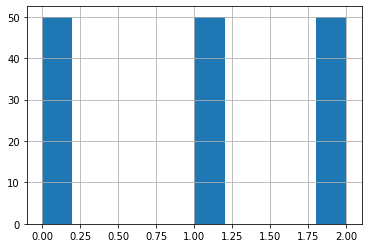

In [166]:
df['Species'].hist()

In [167]:
X = df.drop('Species', axis=1).values
y = df['Species'].values

In [182]:
class KNearestNeighbors:

    def __init__(self, K: int):
        self.K = K

    def fit(self, X, y):
        self.X = X
        self.y = y

    def infer(self, x):
        # Check that the input data matches the training data
        try:
            assert len(x) == self.X.shape[-1]
        except AssertionError:
            print(x.shape, self.X.shape[-1])
            print('Shapes of inferred input and training data do not match')
            return
        
        # Calculate a distance between the new datapoint and all the others
        
        # In this case I am going to choose the sum of the squared difference components
        d = np.sum(np.power(self.X - x, 2), axis=1)
        dy = np.concatenate((d.reshape(-1, 1), self.y.reshape(-1, 1)), axis=1)
        dy = dy[dy[:, 0].argsort()]

        K_nearest = dy[:, -1][:self.K]
        unique_classes = np.unique(self.y)
        probs = {uc : len(K_nearest[K_nearest==uc])/self.K for uc in unique_classes}

        return max(probs, key=probs.get)


In [183]:
wrong = 0
right = 0

k = KNearestNeighbors(30)
k.fit(X,y)
for i in range(30):
    r = np.random.randint(0, 150)
    x = df.iloc[r,:].values[:-1]
    true = df.iloc[r,:].values[-1]
    res = k.infer(x)
    if res == true:
        right += 1
    else:
        wrong += 1

(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do not match
(5,) 2
Shapes of inferred input and training data do no

In [184]:
print(f'Right: {right} and Wrong: {wrong}')

Right: 0 and Wrong: 30


In [185]:
cov = np.array([
    [1,0],
    [0,1]
])

# Gaussian distribution n1
sample_1 = np.random.multivariate_normal(mean=np.array([1,2]), cov=cov, size=300)
y_1 = np.zeros(shape=len(sample_1[:, 0]))

In [186]:
sample_2 = np.random.multivariate_normal(mean=np.array([4,3]), cov=cov, size=300)
y_2 = np.ones(shape=len(sample_2[:,0]))


In [187]:
X = np.vstack((sample_1, sample_2))
y = np.hstack((y_1, y_2)).reshape(-1, 1)

In [188]:
X_y=np.concatenate((X,y), axis=1)

In [189]:
np.random.shuffle(X_y)

In [190]:
k = KNearestNeighbors(K=30)
k.fit(X_y[:, :-1], X_y[:, -1])

In [191]:
X_y

array([[1.23693243, 2.10721198, 0.        ],
       [0.19785488, 2.40260671, 0.        ],
       [3.307553  , 3.09596827, 1.        ],
       ...,
       [5.86305846, 1.63488055, 1.        ],
       [0.89271631, 2.39737496, 0.        ],
       [1.44242397, 2.30193025, 0.        ]])

In [192]:
#On top of it plot the decision boundary created by the algorithm
sample_v = np.random.multivariate_normal(mean=np.array([3,3]), cov=cov, size=1500)
class_v = np.zeros(len(sample_v[:,0]))
for i in range(len(sample_v[:, 0])):
    class_v[i] = k.infer(sample_v[i, :])

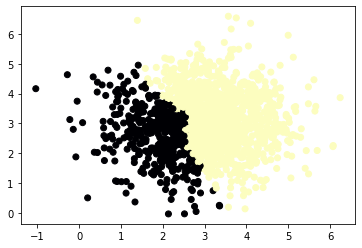

In [193]:
plt.scatter(x= sample_v[:, 0], y= sample_v[:, 1], c=class_v, cmap='magma')

